In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv('./data/ref_impact_results.csv')
df

,Institution name,Institution code (UKPRN),Unit of assessment number,FTE Category A staff submitted,unclassified,1*,2*,3*,4*
0,Anglia Ruskin University,10000291,3,11.30,0.0,0.0,0.000,0.800,0.200
1,Anglia Ruskin University,10000291,4,13.70,0.0,0.8,0.200,0.000,0.000
2,Anglia Ruskin University,10000291,5,7.25,0.0,0.2,0.700,0.100,0.000
3,Anglia Ruskin University,10000291,15,8.00,0.0,0.0,0.300,0.700,0.000
4,Anglia Ruskin University,10000291,16,8.00,0.0,0.5,0.500,0.000,0.000
...,...,...,...,...,...,...,...,...,...
1906,University of Ulster,10007807,29,12.90,0.0,0.0,0.400,0.600,0.000
1907,University of Ulster,10007807,30,16.40,0.0,0.0,0.233,0.634,0.133
1908,University of Ulster,10007807,34,24.80,0.0,0.0,0.267,0.000,0.733
1909,University of Ulster,10007807,35,13.40,0.0,0.0,0.000,0.100,0.900


In [40]:
df['weighted'] = (df['FTE Category A staff submitted'] * df['unclassified']) + \
                 (df['FTE Category A staff submitted'] * df['1*']) + \
                 (df['FTE Category A staff submitted'] * df['2*']) + \
                 (df['FTE Category A staff submitted'] * df['3*']) + \
                 (df['FTE Category A staff submitted'] * df['4*'])

In [41]:
df

,Institution name,Institution code (UKPRN),Unit of assessment number,FTE Category A staff submitted,unclassified,1*,2*,3*,4*,weighted
0,Anglia Ruskin University,10000291,3,11.30,0.0,0.0,0.000,0.800,0.200,11.30
1,Anglia Ruskin University,10000291,4,13.70,0.0,0.8,0.200,0.000,0.000,13.70
2,Anglia Ruskin University,10000291,5,7.25,0.0,0.2,0.700,0.100,0.000,7.25
3,Anglia Ruskin University,10000291,15,8.00,0.0,0.0,0.300,0.700,0.000,8.00
4,Anglia Ruskin University,10000291,16,8.00,0.0,0.5,0.500,0.000,0.000,8.00
...,...,...,...,...,...,...,...,...,...,...
1906,University of Ulster,10007807,29,12.90,0.0,0.0,0.400,0.600,0.000,12.90
1907,University of Ulster,10007807,30,16.40,0.0,0.0,0.233,0.634,0.133,16.40
1908,University of Ulster,10007807,34,24.80,0.0,0.0,0.267,0.000,0.733,24.80
1909,University of Ulster,10007807,35,13.40,0.0,0.0,0.000,0.100,0.900,13.40


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1911 entries, 0 to 1910
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Institution name           1911 non-null   object 
 1   Institution code (UKPRN)   1911 non-null   int64  
 2   Unit of assessment number  1911 non-null   int64  
 3   unclassified               1911 non-null   float64
 4   1*                         1911 non-null   float64
 5   2*                         1911 non-null   float64
 6   3*                         1911 non-null   float64
 7   4*                         1911 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 119.6+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f98e4af9150>]],
      dtype=object)

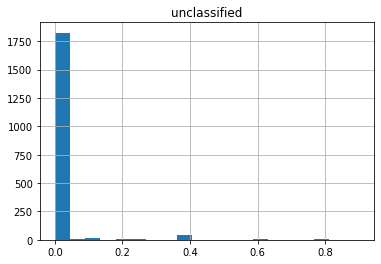

In [6]:
df.hist(column='unclassified', bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f98e46348d0>]],
      dtype=object)

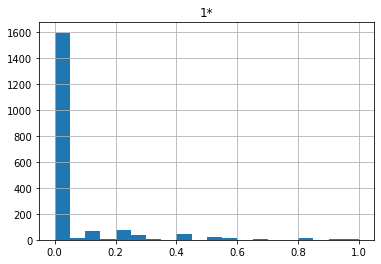

In [7]:
df.hist(column='1*', bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f98e44da210>]],
      dtype=object)

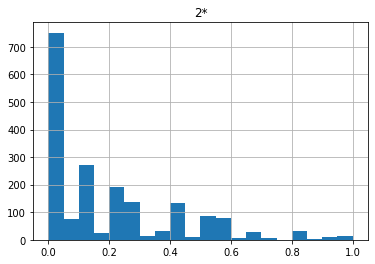

In [8]:
df.hist(column='2*', bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f98e4483f50>]],
      dtype=object)

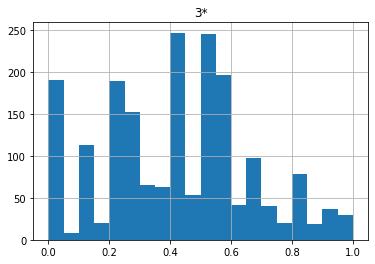

In [9]:
df.hist(column='3*', bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f98e439bdd0>]],
      dtype=object)

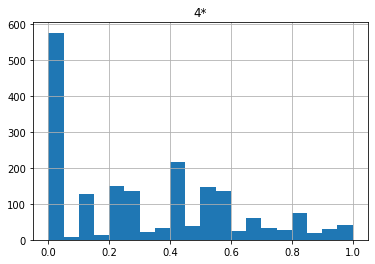

In [10]:
df.hist(column='4*', bins=20)

In [30]:
def combine_scores(df, w0, w1, w2, w3, w4):
    df['combined'] = w0 * df['unclassified'] + w1 * df['1*'] + w2 * df['2*'] + w3 * df['3*'] + w4 * df['4*']
    return df

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f98df91bbd0>]],
      dtype=object)

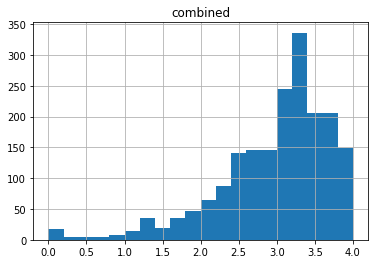

In [31]:
test = combine_scores(df, 0, 1, 2, 3, 4)
test.hist(column='combined', bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f98df59f810>]],
      dtype=object)

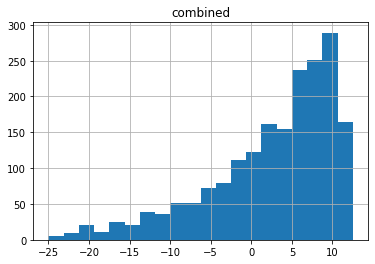

In [35]:
test = combine_scores(df, 0, -25, -12.5, 5, 12.5)
test.hist(column='combined', bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f98df7a2e50>]],
      dtype=object)

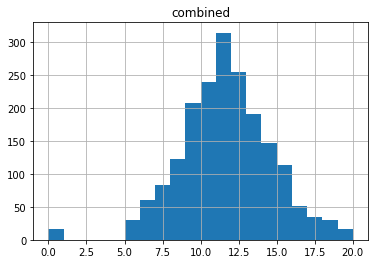

In [33]:
test = combine_scores(df, 15, 10, 20, 5, 15)
test.hist(column='combined', bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f98df5595d0>]],
      dtype=object)

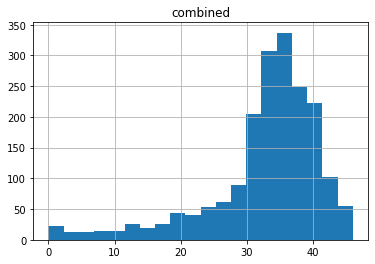

In [36]:
test = combine_scores(df, 1, 3, 20, 46, 30)
test.hist(column='combined', bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f98df46c550>]],
      dtype=object)

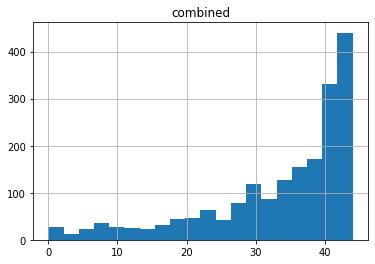

In [37]:
test = combine_scores(df, 0.7, 2.4, 13, 39.9, 44)
test.hist(column='combined', bins=20)

In [44]:
df['weighted'].min(), df['weighted'].max()

(0.0, 449.73999999999995)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f98df387110>]],
      dtype=object)

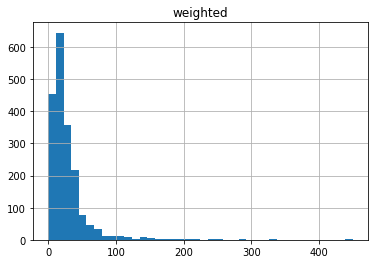

In [45]:
df.hist(column='weighted', bins=40)

1856


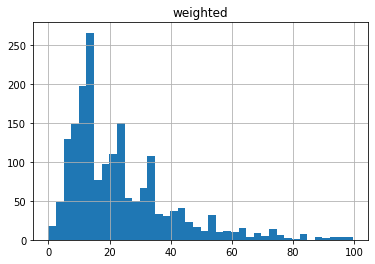

In [48]:
subset = df[df['weighted']  <= 100]
subset.hist(column='weighted', bins=40)
print(len(subset))

In [49]:
scaled = df

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f98defbad10>]],
      dtype=object)

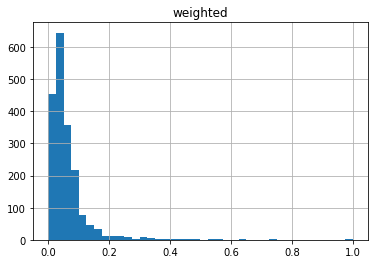

In [50]:
scaled['weighted'] = (scaled['weighted'] - scaled['weighted'].min()) / (scaled['weighted'].max() - scaled['weighted'].min())
scaled.hist(column='weighted', bins=40)